In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kdd-cup-1999-data/kddcup.data.gz
/kaggle/input/kdd-cup-1999-data/training_attack_types
/kaggle/input/kdd-cup-1999-data/kddcup.data.corrected
/kaggle/input/kdd-cup-1999-data/kddcup.newtestdata_10_percent_unlabeled.gz
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled.gz
/kaggle/input/kdd-cup-1999-data/corrected.gz
/kaggle/input/kdd-cup-1999-data/kddcup.data_10_percent.gz
/kaggle/input/kdd-cup-1999-data/kddcup.names
/kaggle/input/kdd-cup-1999-data/kddcup.data_10_percent_corrected
/kaggle/input/kdd-cup-1999-data/typo-correction.txt
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled_10_percent.gz
/kaggle/input/kdd-cup-1999-data/kddcup.data/kddcup.data
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled/kddcup.testdata.unlabeled
/kaggle/input/kdd-cup-1999-data/corrected/corrected
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled_10_percent/kddcup.testdata.unlabeled_10_percent
/kaggle/input/kdd-cup-1999-data/kddcup.newtestdata_10_percent_unlabeled/kd

In [35]:
# Anomaly Detection in Network Traffic using Isolation Forest and Autoencoder

# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt
import seaborn as sns


In [39]:
data_path = '/kaggle/input/kdd-cup-1999-data/kddcup.data.corrected' #Specifies the path to the dataset.

In [40]:

# Define column names manually since kddcup.names is not in csv format
columns = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins","logged_in",
             "num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds",
             "is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
             "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate",
             "dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
             "dst_host_srv_rerror_rate","label"]

# Load data
df = pd.read_csv(data_path, names=columns)

In [41]:
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [42]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [44]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,...,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06
mean,4.834243e+01,1.834621e+03,1.093623e+03,5.716116e-06,6.487792e-04,7.961733e-06,1.243766e-02,3.205108e-05,1.435290e-01,8.088304e-03,...,2.329811e+02,1.892142e+02,7.537132e-01,3.071111e-02,6.050520e-01,6.464107e-03,1.780911e-01,1.778859e-01,5.792780e-02,5.765941e-02
std,7.233298e+02,9.414311e+05,6.450123e+05,2.390833e-03,4.285434e-02,7.215084e-03,4.689782e-01,7.299408e-03,3.506116e-01,3.856481e+00,...,6.402094e+01,1.059128e+02,4.111860e-01,1.085432e-01,4.809877e-01,4.125978e-02,3.818382e-01,3.821774e-01,2.309428e-01,2.309777e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,4.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,4.900000e+01,4.100000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,5.200000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,2.550000e+02,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,1.032000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,2.550000e+02,1.000000e+00,4.000000e-02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,5.832900e+04,1.379964e+09,1.309937e+09,1.000000e+00,3.000000e+00,1.400000e+01,7.700000e+01,5.000000e+00,1.000000e+00,7.479000e+03,...,2.550000e+02,2.550000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


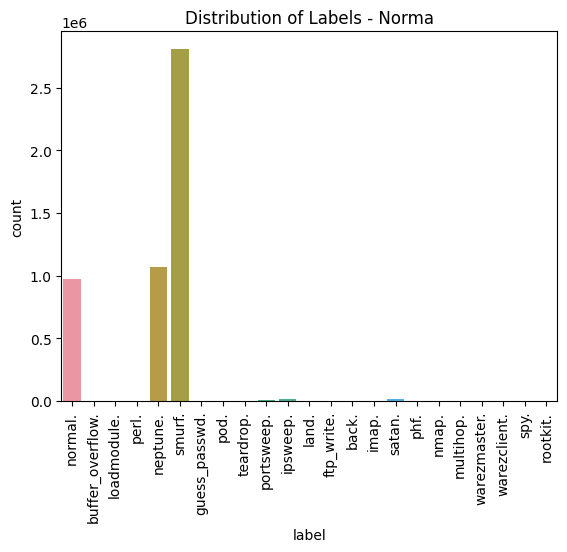

In [45]:
# Check the distribution of the target variable (e.g., normal vs anomaly)
sns.countplot(data=df, x='label')
plt.xticks(rotation=90)
plt.title('Distribution of Labels - Norma')
plt.show()

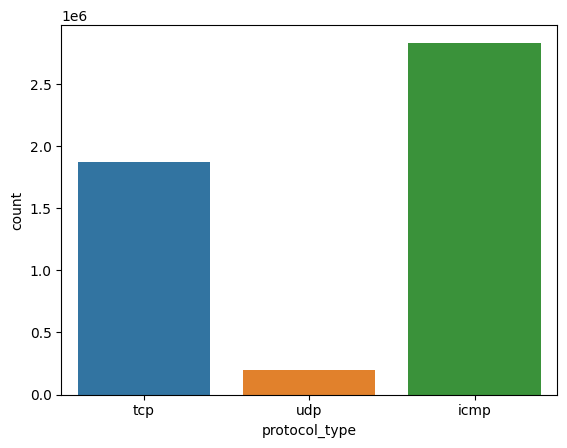

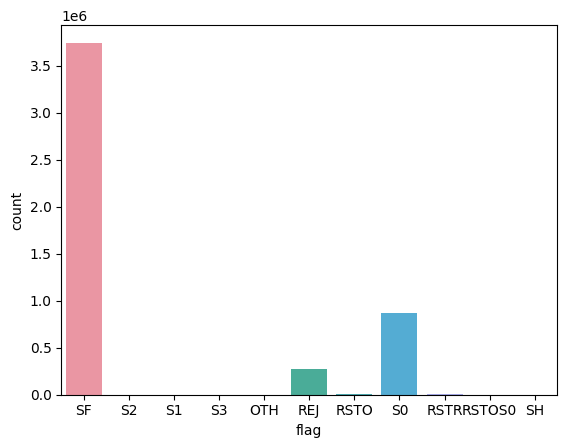

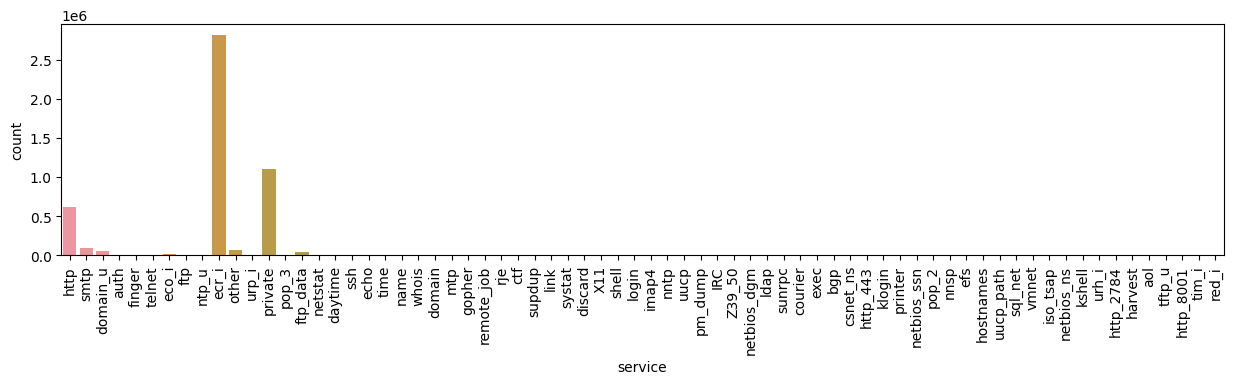

In [46]:
# Visualize categorical variable distributions
sns.countplot(data=df, x='protocol_type')
plt.show()

sns.countplot(data=df, x='flag')
plt.show()

plt.figure(figsize=(15,3))
sns.countplot(data=df, x='service')
plt.xticks(rotation=90)
plt.show()

In [47]:

# Step 3: Binarize the Label (Normal vs Anomaly)
df['label'] = df['label'].apply(lambda x: 0 if x == 'normal.' else 1)


In [48]:


# Step 4: Encode Categorical Features
cat_cols = ['protocol_type', 'service', 'flag']
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

In [49]:
# Step 5: Feature Scaling
features = df.drop('label', axis=1)
labels = df['label']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


In [60]:
# -------------------------------
# MODEL 1: Isolation Forest
# -------------------------------
isf = IsolationForest(contamination=0.1, random_state=42)
y_pred_isf = isf.fit_predict(X_scaled)
y_pred_isf = [0 if x == 1 else 1 for x in y_pred_isf]

print("\n--- Isolation Forest Report ---")
print(confusion_matrix(labels, y_pred_isf))
print(classification_report(labels, y_pred_isf))


--- Isolation Forest Report ---
[[ 751144  221637]
 [3657453  268197]]
              precision    recall  f1-score   support

           0       0.17      0.77      0.28    972781
           1       0.55      0.07      0.12   3925650

    accuracy                           0.21   4898431
   macro avg       0.36      0.42      0.20   4898431
weighted avg       0.47      0.21      0.15   4898431



In [54]:

# -------------------------------
# MODEL 2: Autoencoder
# -------------------------------
input_dim = X_scaled.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(32, activation='relu')(input_layer)
encoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')


In [55]:

# Train only on normal data
X_train_ae = X_scaled[labels == 0]
autoencoder.fit(X_train_ae, X_train_ae, epochs=10, batch_size=256, shuffle=True, validation_split=0.2)


Epoch 1/10
3040/3040 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.9832 - val_loss: 0.3826
Epoch 2/10
3040/3040 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.1913 - val_loss: 0.3685
Epoch 3/10
3040/3040 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.4424 - val_loss: 0.3727
Epoch 4/10
3040/3040 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.1813 - val_loss: 0.2805
Epoch 5/10
3040/3040 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.1832 - val_loss: 0.2352
Epoch 6/10
3040/3040 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.1397 - val_loss: 0.1891
Epoch 7/10
3040/3040 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0791 - val_loss: 0.1288
Epoch 8/10
3040/3040 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0790 - val_loss: 0.0793
Epoch 9/10
3040/3040 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0423 - val_loss: 0.4218
Epoch 10/10
3040/3040 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0912 - val_loss: 0.1756


In [56]:

# Predict on all data
X_pred = autoencoder.predict(X_scaled)
mse = np.mean(np.power(X_scaled - X_pred, 2), axis=1)


153076/153076 ━━━━━━━━━━━━━━━━━━━━ 152s 991us/step


In [58]:

# Define threshold for anomaly detection
threshold = np.percentile(mse, 95)
y_pred_ae = [1 if e > threshold else 0 for e in mse]

print("\n--- Autoencoder Report ---")
print(confusion_matrix(labels, y_pred_ae))
print(classification_report(labels, y_pred_ae))



--- Autoencoder Report ---
[[ 966570    6211]
 [3686958  238692]]
              precision    recall  f1-score   support

           0       0.21      0.99      0.34    972781
           1       0.97      0.06      0.11   3925650

    accuracy                           0.25   4898431
   macro avg       0.59      0.53      0.23   4898431
weighted avg       0.82      0.25      0.16   4898431



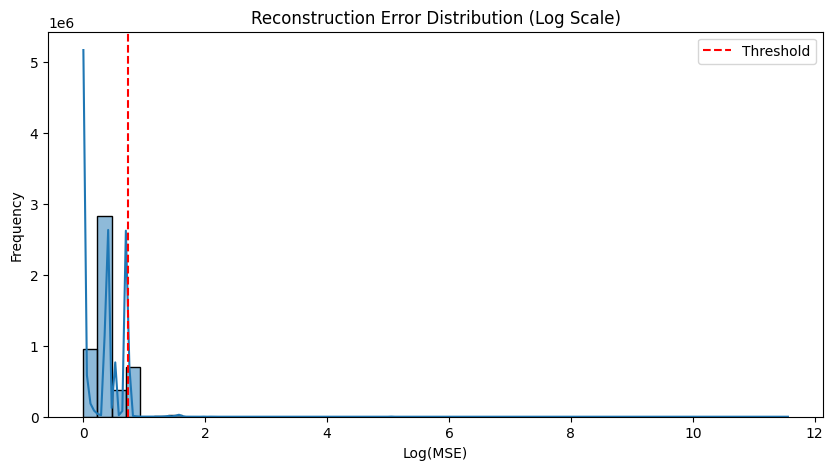

In [59]:
import numpy as np

plt.figure(figsize=(10,5))
sns.histplot(np.log1p(mse), bins=50, kde=True) 
plt.axvline(np.log1p(threshold), color='r', linestyle='--', label='Threshold')
plt.title("Reconstruction Error Distribution (Log Scale)")
plt.xlabel("Log(MSE)")
plt.ylabel("Frequency")
plt.legend()
plt.show()
